## **CH32845 - Data Science** 
#### *Tercera Entrega*

### Sobre el Dataset
 El chocolate es una de las golosinas más populares a nivel mundial. Anualmente, la población de los Estados Unidos consumen colectivamente más de 3.3 mil millones de dólares. No obstante, no todas las barras de chocolate son similares. Este conjunto de datos incluye evaluaciones de expertos de más de 1.700 barras de chocolate distintas, incluyendo detalles sobre su origen regional, la proporción de cacao, la variedad de grano de chocolate empleada y donde fueron cultivados los mismos.

### Contenido específico del Dataset
Las descripciones de las columnas se dan a continuación:
- id - número de identificación de la reseña

- manufacturer - Nombre del fabricante de la barra

- company_location - Ubicación del fabricante

- year_reviewed - Desde 2006 hasta 2021

- bean_origin - País de origen de los granos de cacao

- bar_name - Nombre de la barra de chocolate

- cocoa_percent - Porcentaje de cacao de la barra (%)

- num_ingredients - Número de ingredientes

- ingredients - B (Granos), S (Azúcar), S* (Edulcorante distinto a la azúcar o azúcar de remolacha), C (Manteca de cacao), (V) Vainilla, (L) Lecitina, (Sa) Sal

- review - Resumen de las características más memorables de la barra de chocolate

- rating - 1.0-1.9 Desagradable, 2.0-2.9 decepcionante, 3.0-3.49 Recomendado, 3.5-3.9 Altamente recomendado, 4.0-5.0 Excelente

### Dataset
- [Chocolate Bar Ratings](https://www.kaggle.com/datasets/evangower/chocolate-bar-ratings)  - Ratings of over 2,500 chocolate bars from around the globe

#### Análisis Descriptivo

Las variables potencialmente interesantes son: 'bean_origin', 'cocoa_percent', 'num_ingredients',
       'ingredients' y 'rating'.

Algunas de las preguntas que este análisis intentará responder:
- ¿Qué origen tienen los granos de cacao con más alta calificación?
- ¿Existe una relación entre número de ingredientes y el porcentaje de cacao a la hora de obtener una más alta calificación?
- ¿Los ingredientes de la barra de chocolate afectan a su calificación?
- Con el correr de los años, el rating del top 3 de barras de chocolate, ¿Qué variación tuvo?
---

#### Carga de Datos

In [67]:
# Se importan las librerías necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Indicar las versiones de las librerías
import sys
print("Python version: {}".format(sys.version))
print("Numpy version: {}".format(np.__version__))
print("Pandas version: {}".format(pd.__version__))

Python version: 3.10.4 (main, Dec 19 2022, 20:24:16) [GCC 9.4.0]
Numpy version: 1.24.0
Pandas version: 1.5.2


In [69]:
# Leer los datos en PY
df = pd.read_csv('./data/chocolate_bars.csv')

#### Exploración de Datos

In [70]:
# Qué tamaño tienen los datos?
df.shape

(2530, 11)

In [71]:
# Nombre de las columnas para conocer los datos que proporciona este DF
df.columns

Index(['id', 'manufacturer', 'company_location', 'year_reviewed',
       'bean_origin', 'bar_name', 'cocoa_percent', 'num_ingredients',
       'ingredients', 'review', 'rating'],
      dtype='object')

In [72]:
#  Impresión (parcial) del DF
df

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25


In [73]:
# Qué tipos de datos tienen las columnas?
df.dtypes

id                    int64
manufacturer         object
company_location     object
year_reviewed         int64
bean_origin          object
bar_name             object
cocoa_percent       float64
num_ingredients     float64
ingredients          object
review               object
rating              float64
dtype: object

In [74]:
# Qué info proporciona el DF?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


In [75]:
# Descripción estadística de los datos
df.describe()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
count,2530.000000,2530.000000,2530.000000,2443.000000,2530.000000
mean,1429.800791,2014.374308,71.639723,3.041343,3.196344
std,757.648556,3.968267,5.616724,0.913728,0.445321
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,802.000000,2012.000000,70.000000,2.000000,3.000000
50%,1454.000000,2015.000000,70.000000,3.000000,3.250000
75%,2079.000000,2018.000000,74.000000,4.000000,3.500000
max,2712.000000,2021.000000,100.000000,6.000000,4.000000


El porcentaje promedio de cacao en todo el conjunto de datos es del 72%. 
Los valores mínimo y máximo de porcentaje de cacao son 42% y 100%, respectivamente. El 100% de cacao en una barra de chocolate es amargo para alguien que le gustan los dulces.
La calificación promedio de chocolate para todo el conjunto de datos es de 3.19. Los valores mínimo y máximo de calificación que existen en este conjunto de datos son 1 y 4, respectivamente.

In [76]:
df['id'] = df['id'].astype('object')  # cambio el tipo de datos de la columna id a objeto
df['year_reviewed'] = df['year_reviewed'].astype('object') # cambio el tipo de datos de la columna year_reviewed a objeto por ser fecha
df_categorics = df.select_dtypes(include=['object'])  # ya convertidas las selecciono
df_categorics.describe()  # Descripción estadística de los datos seleccionados

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,ingredients,review
count,2530,2530,2530,2530,2530,2530,2443,2530
unique,630,580,67,16,62,1605,21,2487
top,414,Soma,U.S.A.,2015,Venezuela,Madagascar,"B,S,C","spicy, cocoa"
freq,10,56,1136,284,253,55,999,4


Basándonos en los resultados, podemos afirmar lo siguiente:

- Hay 630 chocolates negros únicos disponibles en este dataset. De ellos, la tableta de chocolate con el número de referencia 414 aparece con mayor frecuencia.

- Figuran 580 fabricantes distintos de los cuales la compañía llamada Soma es la más frecuente.

- La mayoría de las compañías están situadas en los Estados Unidos.

- La mayoría de las reseñas fueron registradas en el año 2015.

- La mayoría de los chocolates se hacen a partir de granos de cacao originarios de Venezuela.

- La tableta de chocolate de Madagascar es más frecuente.

- Los ingredientes más utilizados son granos, azúcar y cacao.

- El sabor más común es el cacao picante.

In [77]:
# Segmentación del DF que exclusivamente incluye las columnas señaladas como importantes para este análisis
df_selection = df.loc[:, ['bean_origin', 'cocoa_percent', 'num_ingredients','ingredients','rating']]

In [78]:
# Primeros 5 datos del DF segmentado
df_selection.head()

,bean_origin,cocoa_percent,num_ingredients,ingredients,rating
0,Tanzania,76.0,3.0,"B,S,C",3.25
1,Dominican Republic,76.0,3.0,"B,S,C",3.50
2,Madagascar,76.0,3.0,"B,S,C",3.75
3,Fiji,68.0,3.0,"B,S,C",3.00
4,Venezuela,72.0,3.0,"B,S,C",3.00


In [79]:
# Últimos 5 datos del DF segmentado
df_selection.tail()

,bean_origin,cocoa_percent,num_ingredients,ingredients,rating
2525,Blend,80.0,4.0,"B,S*,C,Sa",2.75
2526,Colombia,75.0,3.0,"B,S,C",3.75
2527,Blend,75.0,3.0,"B,S,C",3.00
2528,Congo,70.0,3.0,"B,S,C",3.25
2529,Belize,72.0,3.0,"B,S,C",3.50


In [80]:
# Identificación de valores nulos (el .sum() retorna un recuento de los valores nulos, omitiendolo devuelve True False en c/linea)
df.isnull().sum() 

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

#### Distribución de los granos de Cacao de acuerdo a su origen
Gráfico de caja que representa la distribución de calificaciones del chocolate agrupadas por origen de grano de cacao.  

In [81]:
# Cantidad de valores únicos en la columna 'bean_origin'
df.bean_origin.nunique()

62

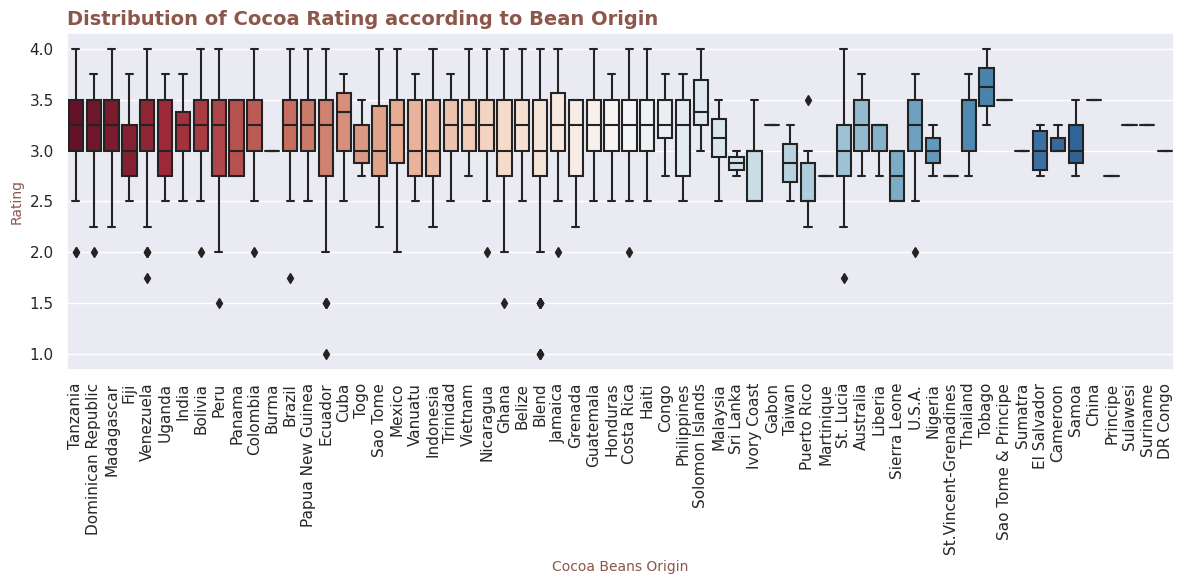

In [82]:
fig, ax = plt.subplots(figsize=[12,6])  # Crea una gráfico de tipo fig de 12in de largo por 6in de alto.
sns.set(rc={'axes.facecolor':'#d9d7d2', 'figure.facecolor':'white'}) # Establece el color del fondo de imagen para contrastar mejor los resultados
sns.boxplot(data=df, y='rating', x='bean_origin',ax=ax, palette='RdBu')  # is creating a box plot using the DataFrame df, with the variable 'rating' on the y-axis and 'bean_origin' on the x-axis. The ax parameter is specifying the axes on which to create the plot, in this case the ax object created in the first line.
plt.ylabel('Rating', fontdict = {'fontsize':10, 'color':'tab:brown'})  # Etiqueta de nombre del eje y con tamaño de letra de 10px y color marrón
plt.xlabel('Cocoa Beans Origin', fontdict = {'fontsize':10, 'color':'tab:brown'}) # Etiqueta de nombre del eje x con tamaño de letra de 10px y color marrón
plt.xticks(rotation = 90)  # Rota las etiquetas del eje-x 90 grados.
plt.title('Distribution of Cocoa Rating according to Bean Origin', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:brown'}) # Título del gráfico con tamaño de letra de 14px, en negrita y color marrón posicionado a la izq.
# plt.show() imprime el grafico de forma desproporcionada
fig.tight_layout()  # Redimensiona el grafico para mejor visualización.

In [83]:
df_by_origin = df.groupby(by='bean_origin')['rating'].describe()
sort_by_median = df_by_origin.sort_values(by='50%', ascending=False)
sort_by_75perc = df_by_origin.sort_values(by='75%', ascending=False)
sort_by_median.reset_index().loc[:4,'bean_origin']

0                 Tobago
1    Sao Tome & Principe
2               Thailand
3                  China
4                   Cuba
Name: bean_origin, dtype: object

In [84]:
sort_by_75perc.reset_index().loc[:4,'bean_origin']

0                 Tobago
1        Solomon Islands
2                   Cuba
3                Jamaica
4    Sao Tome & Principe
Name: bean_origin, dtype: object

Dependiendo la medida que se consulte (mediana o percentil 75) es el resultado que retorna respecto a los mejores granos.

#### Distribución de la cantidad de ingredientes en las Tabletas de Chocolate

Crea un Gráfico de Barras que muestra el Número de Ingredientes en la muestra de las Tabletas de Chocolate.

In [85]:
# Vista rápida de los dos primeros valores que deberían aparecer como más frecuentes en la cant. total de ingredientes 
df.num_ingredients.sample(10) 

2456    3.0
1876    2.0
2471    2.0
1252    3.0
531     2.0
2023    4.0
2331    3.0
261     2.0
1791    5.0
2352    3.0
Name: num_ingredients, dtype: float64

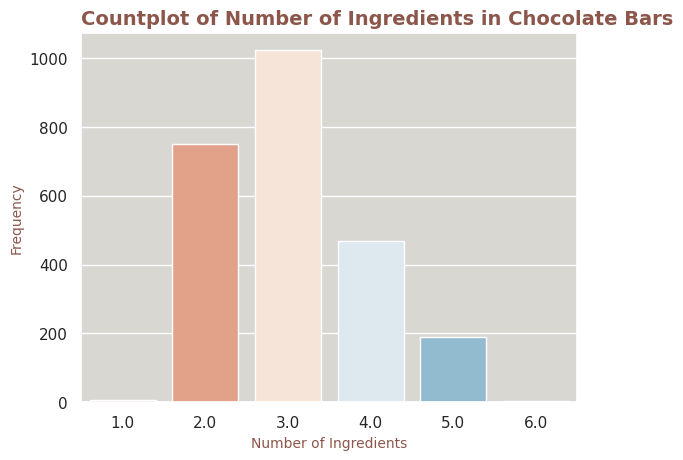

In [86]:
sns.countplot(x='num_ingredients', data=df, palette='RdBu')
plt.ylabel('Frequency', fontdict = {'fontsize':10, 'color':'tab:brown'})  # Etiqueta de nombre del eje y con tamaño de letra de 10px y color marrón
plt.xlabel('Number of Ingredients', fontdict = {'fontsize':10, 'color':'tab:brown'}) # Etiqueta de nombre del eje x con tamaño de letra de 10px y color marrón
plt.title('Countplot of Number of Ingredients in Chocolate Bars', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:brown'}) # Título del gráfico con tamaño de letra de 14px, en negrita y color marrón posicionado a la izq.
plt.show()

Como ya habíamos determinado previamente, la mayoría de las barras de chocolate tienen 3 ingredientes.
- Recordando: Los ingredientes más utilizados son granos, azúcar y cacao.


#### Distribución del porcentaje de Cacao en las Tabletas de Chocolate

Crea un diagrama de violín de la distribución de la variable 'cocoa_percent' del DataFrame. Esta gráfica mostrará los valores mínimo, primer cuartil, mediana, tercer cuartil y máximo de la variable 'cocoa_percent' con respecto a su presencia en las Tabletas de Chocolate analizadas.

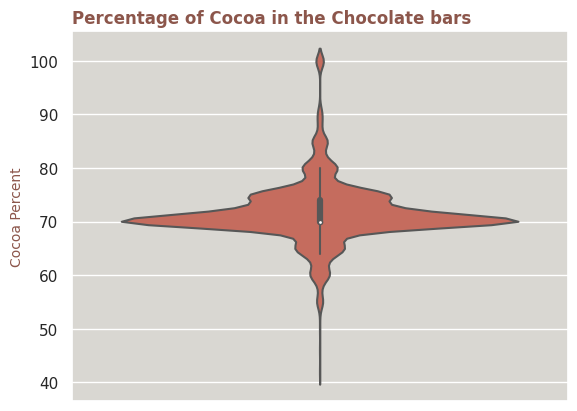

In [87]:
sns.violinplot(y=df['cocoa_percent'],color='#d6604d')
plt.ylabel('Cocoa Percent', fontdict = {'fontsize':10, 'color':'tab:brown'})  # Etiqueta de nombre del eje y con tamaño de letra de 10px y color marrón
plt.title('Percentage of Cocoa in the Chocolate bars', loc = "left", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'tab:brown'}) # Título del gráfico con tamaño de letra de 14px, en negrita y color marrón posicionado a la izq.
plt.show()

Los chocolates que tienen un 80% o 70% cacao son de los que más cacao tienen o mejor pureza poseen, ya que casi no están mezclados con otros ingredientes. 70% es considerado amargo pero contiene la suficiente cantidad de azúcar como para ser agradable al paladar general. Posiblemente por ello es que predomine en la elección de las distintas barras estudiadas. 
En el gráfico se visualizan que la mayoría de los barras de chocolate tienen un 70% de cacao, seguido del 75% y el 72% (aprox).

#### Las 5 mejores empresas en términos de Barras de Chocolate

Crea un gráfico de barras de la distribución de las empresas en función a la cantidad de tabletas que manufacturan.

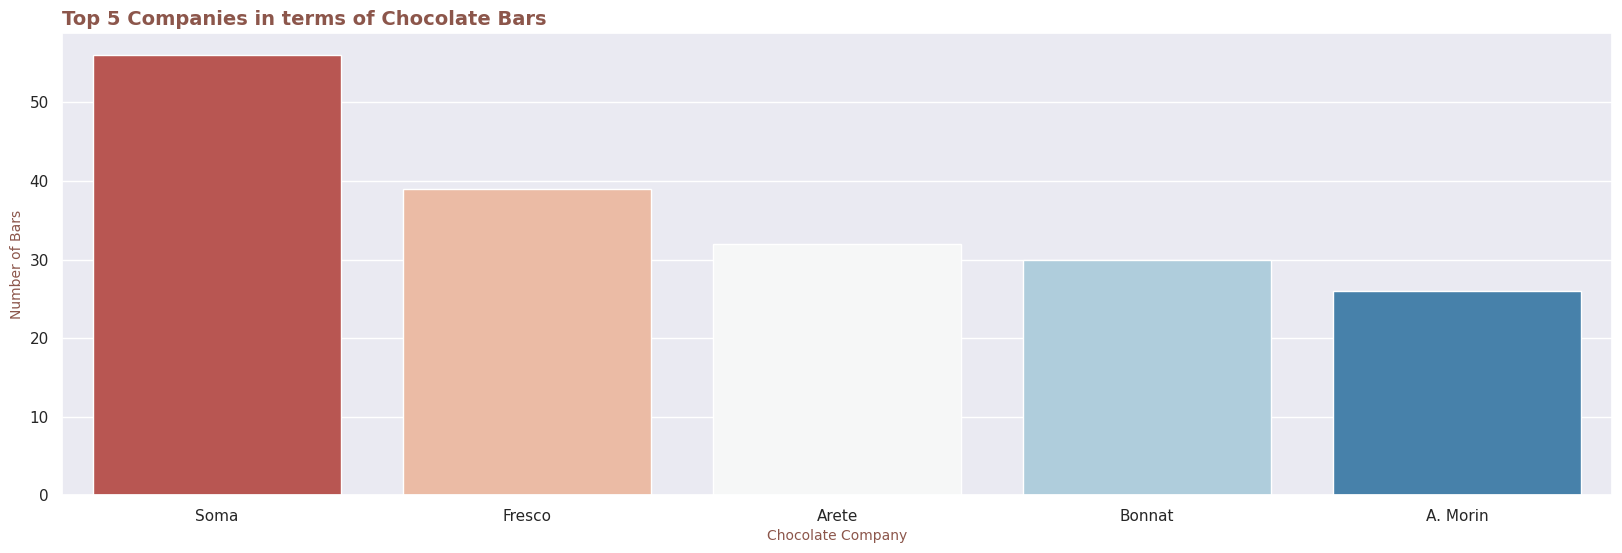

In [88]:
data1 = df['manufacturer'].value_counts().sort_values(ascending=False).head(5) # Top 5 companies in terms of chocolate bars in this dataset
data1 = pd.DataFrame(data1)
data1 = data1.reset_index()
sns.set()
plt.figure(figsize=(20,6))
sns.barplot(x='index', y='manufacturer', data=data1, palette='RdBu')
plt.ylabel('Number of Bars', fontdict = {'fontsize':10, 'color':'tab:brown'})  # Etiqueta de nombre del eje y con tamaño de letra de 10px y color marrón
plt.xlabel('Chocolate Company', fontdict = {'fontsize':10, 'color':'tab:brown'}) # Etiqueta de nombre del eje x con tamaño de letra de 10px y color marrón
plt.title('Top 5 Companies in terms of Chocolate Bars', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:brown'}) # Título del gráfico con tamaño de letra de 14px, en negrita y color marrón posicionado a la izq.
plt.show()

In [66]:
print(df['manufacturer'].value_counts().head())

Soma        56
Fresco      39
Arete       32
Bonnat      30
A. Morin    26
Name: manufacturer, dtype: int64


Soma tiene el número más alto de barras de chocolate en este conjunto de datos superando las 55.

#### Las 5 mejores empresas en términos de su Calificación promedio

Crea un gráfico de barras de la distribución de las empresas en función del rating calificatorio.

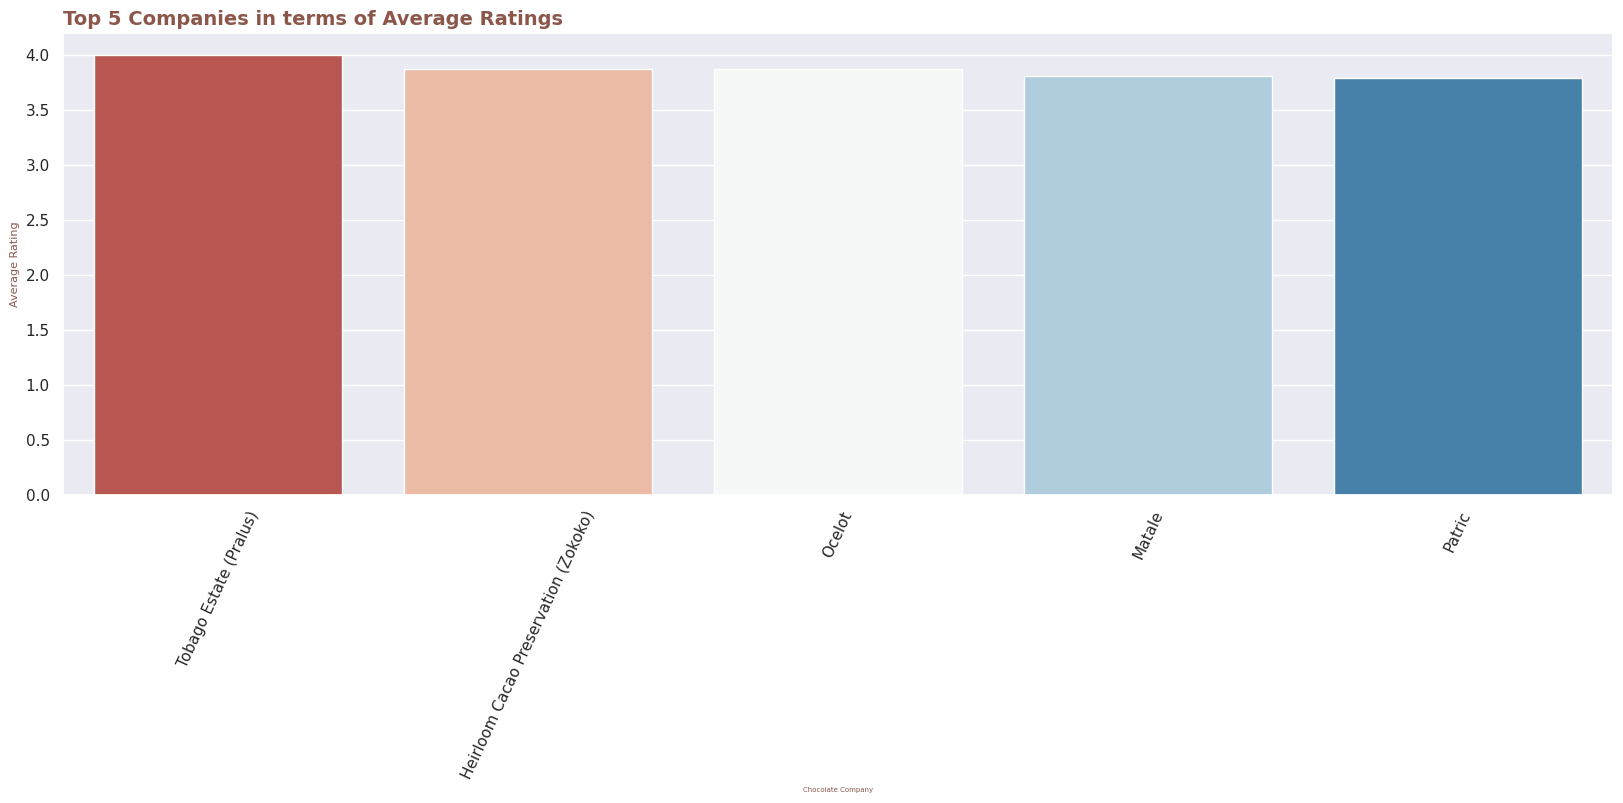

In [89]:
data2 = df.groupby('manufacturer').aggregate({'rating':'mean'})
data2 = data2.sort_values('rating', ascending=False).head(5)
data2 = data2.reset_index()
sns.set()
plt.figure(figsize=(20,6))
sns.barplot(x='manufacturer', y='rating', data=data2, palette='RdBu')
plt.ylabel('Average Rating', fontdict = {'fontsize':8, 'color':'tab:brown'})  # Etiqueta de nombre del eje y con tamaño de letra de 10px y color marrón
plt.xlabel('Chocolate Company', fontdict = {'fontsize':5, 'color':'tab:brown'}) # Etiqueta de nombre del eje x con tamaño de letra de 10px y color marrón
plt.xticks(rotation = 65)
plt.title('Top 5 Companies in terms of Average Ratings', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:brown'}) # Título del gráfico con tamaño de letra de 14px, en negrita y color marrón posicionado a la izq.
plt.show()

In [93]:
data2 = df.groupby('manufacturer').aggregate({'rating':'mean'})
data2 = data2.sort_values('rating', ascending=False).head(5)
data2


,rating
manufacturer,
Tobago Estate (Pralus),4.000000
Heirloom Cacao Preservation (Zokoko),3.875000
Ocelot,3.875000
Matale,3.812500
Patric,3.791667


Tobago Estate (Pralus) tiene una calificación de 4.0 (la más alta, considerada como 'Excelente'), sin embargo solo hay 1 barra de chocolate de dicha empresa registrada en este conjunto de datos. 

#### Relación entre el % de Cacao y el Rating del Chocolate 

Gráfico de dispersión de la relación entre las columnas 'cocoa_percent' y 'rating' del DataFrame, utilizando la columna 'rating' como matiz.

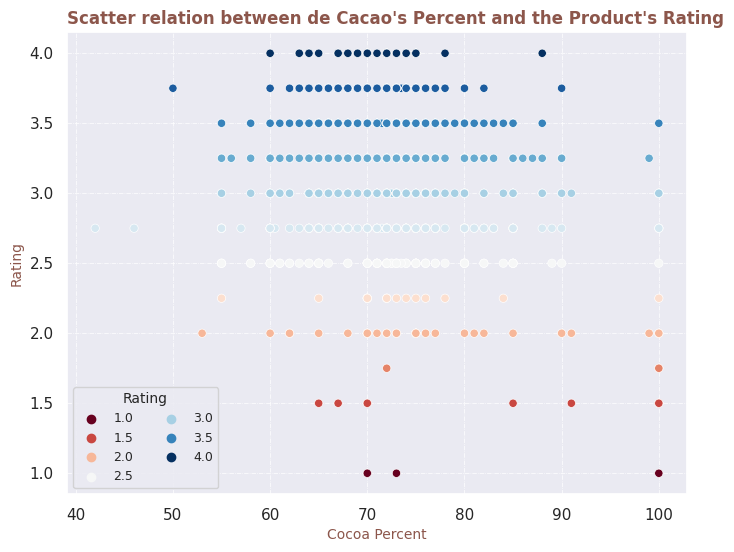

In [ ]:
fig, ax = plt.subplots(figsize=[8,6])  # Crea una gráfico de tipo fig de 8in de largo por 6in de alto.
sns.scatterplot(x='cocoa_percent', y='rating', hue='rating', palette="RdBu",data=df)  # Crea un diagrama de dispersión de la relación entre 'cocoa_percent' y 'rating' del df, utilizando 'rating' para visualizar los matices.
plt.grid(True, linestyle='-.', linewidth=0.5, color='white')  # Que muestre la grilla representada por '-.' en color blanco
plt.ylabel('Rating', fontdict = {'fontsize':10, 'color':'tab:brown'})  # Etiqueta de nombre del eje y con tamaño de letra de 10px y color marrón
plt.xlabel('Cocoa Percent', fontdict = {'fontsize':10, 'color':'tab:brown'}) # Etiqueta de nombre del eje x con tamaño de letra de 10px y color marrón
plt.title('Scatter relation between de Cacao\'s Percent and the Product\'s Rating', loc = "left", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'tab:brown'}) # Título del gráfico con tamaño de letra de 14px, en negrita y color marrón posicionado a la izq.
plt.legend(title="Rating",loc='lower left', ncol=2, fontsize=9, title_fontsize=10)  # Establece el rating como leyenda, lo posiciona e indica el tamaño de las letras
plt.show()

Los chocolates que tienen un 80% o 70% cacao son de los que más cacao tienen o mejor pureza poseen, ya que casi no están mezclados con otros ingredientes, no es de extrañar entonces barra mejor puntuada contenga dicho %.

#### Distribución de la Calificación en las Tabletas de Chocolate

Gráfico de barras que representa la distribución de calificaciones en el total de las Tabletas de Chocolate analizadas.  

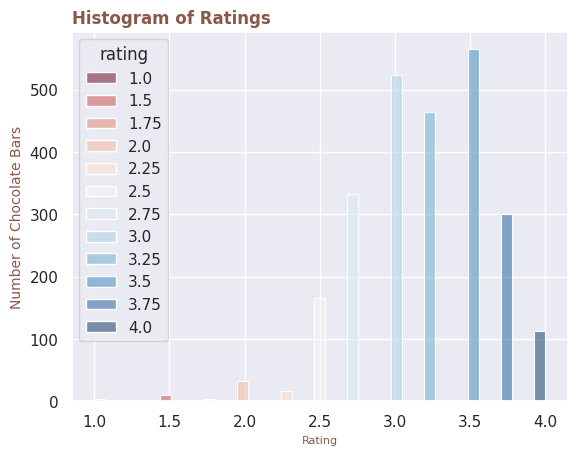

In [ ]:
sns.histplot(data=df, x='rating', hue='rating', palette='RdBu')
plt.ylabel('Number of Chocolate Bars', fontdict = {'fontsize':10, 'color':'tab:brown'})  # Etiqueta de nombre del eje y con tamaño de letra de 10px y color marrón
plt.xlabel('Rating', fontdict = {'fontsize':8, 'color':'tab:brown'}) # Etiqueta de nombre del eje x con tamaño de letra de 10px y color marrón
plt.title('Histogram of Ratings', loc = "left", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'tab:brown'}) # Título del gráfico con tamaño de letra de 14px, en negrita y color marrón posicionado a la izq.
plt.show()

La mayoría de las barras tienen una calificación de 3.5, algo sumamente aceptable si consideramos ques significa Altamente recomendado.